In [1]:
!git clone https://github.com/sonu275981/Fashion-Recommender-system.git

Cloning into 'Fashion-Recommender-system'...
remote: Enumerating objects: 43729, done.
remote: Total 43729 (delta 0), reused 0 (delta 0), pack-reused 43729
Receiving objects: 100% (43729/43729), 213.48 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (16797/16797), done.
Updating files: 100% (44472/44472), done.
Error downloading object: image_features_embedding.pkl (758dbae): Smudge error: Error downloading image_features_embedding.pkl (758dbae738aec0c70d5a6794d0bae4dd7079e58475a0c4778dadc0d658a7b518): batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.

Errors logged to /content/Fashion-Recommender-system/.git/lfs/logs/20240212T124746.302260434.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: image_features_embedding.pkl: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'git restore --source

In [2]:
!ls /content/Fashion-Recommender-system/fashion_small/images

10000.jpg  15821.jpg  2137.jpg	 27339.jpg  33505.jpg  3963.jpg   45976.jpg  52107.jpg	58189.jpg
10001.jpg  15822.jpg  21380.jpg  27340.jpg  33506.jpg  39640.jpg  45977.jpg  52108.jpg	5818.jpg
10002.jpg  15823.jpg  21381.jpg  27341.jpg  33507.jpg  39641.jpg  45979.jpg  52109.jpg	58190.jpg
10003.jpg  15824.jpg  21382.jpg  27342.jpg  33508.jpg  39642.jpg  4597.jpg   5210.jpg	58191.jpg
10004.jpg  15825.jpg  21385.jpg  27343.jpg  33509.jpg  39643.jpg  45980.jpg  52110.jpg	58194.jpg
10005.jpg  15826.jpg  21386.jpg  27344.jpg  3350.jpg   39644.jpg  45981.jpg  52111.jpg	58195.jpg
10006.jpg  15827.jpg  21387.jpg  27345.jpg  33510.jpg  39645.jpg  45982.jpg  52112.jpg	58196.jpg
10007.jpg  15828.jpg  21388.jpg  27346.jpg  33511.jpg  39646.jpg  45983.jpg  52113.jpg	5819.jpg
10008.jpg  15829.jpg  21389.jpg  27347.jpg  33512.jpg  39647.jpg  45984.jpg  52114.jpg	58200.jpg
10009.jpg  1582.jpg   2138.jpg	 27348.jpg  33513.jpg  3964.jpg   45985.jpg  52115.jpg	58201.jpg
10010.jpg  15830.jpg  21391.jpg  27

In [5]:
%cd /content/Fashion-Recommender-system

/content/Fashion-Recommender-system


In [7]:
!ls

app.py	fashion_small  main.py	  requirements.txt  test.py
Demo	img_files.pkl  README.md  sample	    uploader


In [ ]:
"""
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = Sequential([model, GlobalMaxPooling2D()])
#model.summary()

def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expand_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = preprocess_input(expand_img)
    result_to_resnet = model.predict(preprocessed_img)
    flatten_result = result_to_resnet.flatten()
    # normalizing
    result_normlized = flatten_result / norm(flatten_result)

    return result_normlized
#print(os.listdir('fashion_small/images'))
img_files = []

for fashion_images in os.listdir('fashion_small/images'):
    images_path = os.path.join('fashion_small/images', fashion_images)
    img_files.append(images_path)

# extracting image features
image_features = []

for files in tqdm(img_files):
    features_list = extract_features(files, model)
    image_features.append(features_list)

pickle.dump(image_features, open("image_features_embedding.pkl", "wb"))
pickle.dump(img_files, open("img_files.pkl", "wb"))
"""

In [ ]:
feature_lists

In [8]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import  norm
import os
from tqdm import tqdm
import pickle

model = ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

#print(model.summary())
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_arr = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_arr,axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

filenames = []

for file in os.listdir('fashion_small/images'):
    filenames.append(os.path.join('fashion_small/images',file))
filenames = filenames[:20000]
feature_lists = []

for file in tqdm(filenames):
    feature_lists.append(extract_features(file,model))

pickle.dump(feature_lists,open('image_features_embedding.pkl','wb'))
pickle.dump(filenames,open('img_files.pkl','wb'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#mount drive
# %cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#
# list the contents of /mydrive
!ls /mydrive

In [10]:
!cp -r image_features_embedding.pkl /mydrive/image_features_embedding.pkl
!cp -r img_files.pkl /mydrive/img_files.pkl

(20000, 2048)
1/1 [==============================] - 1s 1000ms/step
[[19813  5916  9489 19722  3871  9226]]
fashion_small/images/14327.jpg


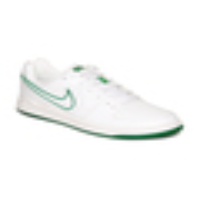

fashion_small/images/38538.jpg


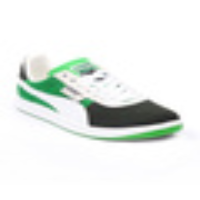

fashion_small/images/39632.jpg


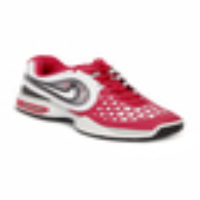

fashion_small/images/4639.jpg


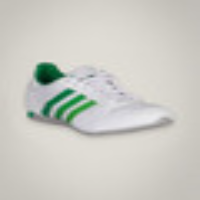

fashion_small/images/10125.jpg


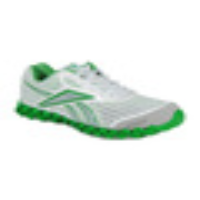

In [13]:
import pickle
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from numpy.linalg import norm
from sklearn.neighbors import NearestNeighbors
import cv2
from google.colab.patches import cv2_imshow

features_list = pickle.load(open("image_features_embedding.pkl", "rb"))
img_files_list = pickle.load(open("img_files.pkl", "rb"))

print(np.array(features_list).shape)

model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model.trainable = False

model = Sequential([model, GlobalMaxPooling2D()])

img = image.load_img('sample/Shoes.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expand_img = np.expand_dims(img_array,axis=0)
preprocessed_img = preprocess_input(expand_img)
result_to_resnet = model.predict(preprocessed_img)
flatten_result = result_to_resnet.flatten()
# normalizing
result_normlized = flatten_result / norm(flatten_result)

neighbors = NearestNeighbors(n_neighbors = 6, algorithm='brute', metric='euclidean')
neighbors.fit(features_list)

distence, indices = neighbors.kneighbors([result_normlized])

print(indices)

for file in indices[0][1:6]:
    print(img_files_list[file])
    tmp_img = cv2.imread(img_files_list[file])
    tmp_img = cv2.resize(tmp_img,(200,200))
    #cv2.imshow("output", tmp_img)
    cv2_imshow(tmp_img)
    #$cv2.waitKey(0)



In [12]:
!ls

app.py	fashion_small		      img_files.pkl  README.md	       sample	uploader
Demo	image_features_embedding.pkl  main.py	     requirements.txt  test.py


In [17]:
%cd ..

/content


In [18]:
!cp -r Fashion-Recommender-system /mydrive

In [20]:
!ls /mydrive/Fashion-Recommender-system

app.py	fashion_small		      img_files.pkl  README.md	       sample	uploader
Demo	image_features_embedding.pkl  main.py	     requirements.txt  test.py
